# Purpose
The idea of this notebook is to create a generator matrix Q with complex eigenvalues. 

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy import * 
from sympy.solvers.solveset import linsolve
from IPython.display import display
init_printing(use_unicode=True,use_latex=True)

In [39]:
# Start setting up environment variables
y = symbols('y')
mat_size = 4
num_coefficients = mat_size**2
ass = symbols('a0:%d'%num_coefficients)
lambdas = (0.25,0.5,0.75,1)

In [54]:
#M = Matrix([[ass[0], ass[1], ass[2],ass[3]], [ass[4], ass[5],ass[6], ass[7]], [ass[8],ass[0]]]) 
m = []
for k in range(mat_size):
    i = k*mat_size
    m.append(ass[i:i+mat_size])
M = Matrix(m)
print(M)
MATSIZE = M.rank() 
lamda = symbols('lamda') 

#det = M.det()
poly = M.charpoly(lamda) # Get the characteristic polynomial print(poly)
poly

Matrix([[a0, a1, a2, a3], [a4, a5, a6, a7], [a8, a9, a10, a11], [a12, a13, a14, a15]])


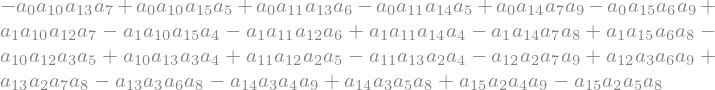

In [56]:
# Set the values
poly_0 = poly.subs({lamda: 0.25})
poly_1 = poly.subs({lamda: 0.50})
poly_2 = poly.subs({lamda: 0.70})
poly_3 = poly.subs({lamda: 1})

#display(poly_0)
display(poly.coeffs()[4])

In [45]:
# Another way 
l = []
for k in range(mat_size):
    l.append([lambdas[k]**v for v in range(mat_size,0,-1)])
L = Matrix(l)
print(L)

Matrix([[0.00390625000000000, 0.0156250000000000, 0.0625000000000000, 0.250000000000000], [0.0625000000000000, 0.125000000000000, 0.250000000000000, 0.500000000000000], [0.316406250000000, 0.421875000000000, 0.562500000000000, 0.750000000000000], [1, 1, 1, 1]])


In [60]:
L = np.matrix(L, dtype='float')
invL = np.linalg.inv(L)
coeff_5_vec = np.ones((4,1))
print(coeff_5_vec)
print(invL)
print('Solution')
print(invL@coeff_5_vec)

[[1.]
 [1.]
 [1.]
 [1.]]
[[ -42.66666667   64.          -42.66666667   10.66666667]
 [  96.         -128.           74.66666667  -16.        ]
 [ -69.33333333   76.          -37.33333333    7.33333333]
 [  16.          -12.            5.33333333   -1.        ]]
Solution
[[-10.66666667]
 [ 26.66666667]
 [-23.33333333]
 [  8.33333333]]


# Random Guesses
Here we are working with just stating of with a Q value matrix that is generated at random. Where all of its values add up to 0 and there are non-netgative on the off diagonals. You have to show one of the only 

In [141]:
# At random 
rand_mat = np.random.uniform(0,10,size=(5,5))
for i in range(5):
    rand_mat[i,i] = -1*(np.sum(rand_mat[i,:]) - rand_mat[i,i])
print(np.sum(rand_mat,axis=1))
print(rand_mat)
print(np.linalg.eigvals(rand_mat))

[ 1.77635684e-15 -1.77635684e-15 -1.33226763e-15  2.22044605e-16
  0.00000000e+00]
[[-26.96252017   3.44870829   9.7381736    5.72092343   8.05471485]
 [  3.30005772 -26.16238339   9.86260689   9.37929701   3.62042178]
 [  8.02572303   0.11637285 -20.15039767   9.13707498   2.87122681]
 [  0.98642479   7.04058165   7.05756289 -15.84633616   0.76176683]
 [  9.7237364    4.30776501   7.43999945   3.38143533 -24.85293618]]
[  0.        +0.j         -19.32993135+0.j
 -35.69214824+0.j         -29.476247  +2.19129346j
 -29.476247  -2.19129346j]


In [140]:
#Same but only for Birth and Death
rand_mat = np.zeros((mat_size,mat_size))
arr_rate = np.random.uniform(0,100) * np.ones((mat_size-1))
serv_rate = np.random.uniform(0,100) * np.ones((mat_size-1))

print(arr_rate)
print(np.diag(arr_rate,1))
rand_mat += np.diag(arr_rate,1) 
rand_mat += np.diag(serv_rate,-1) 
print(rand_mat)
for i in range(mat_size):
    rand_mat[i,i] = -1*(np.sum(rand_mat[i,:]) - rand_mat[i,i])
print(np.sum(rand_mat,axis=1))
print(rand_mat)
print("Eigenvalues for this matrix:", np.linalg.eigvals(rand_mat))

[52.77858816 52.77858816 52.77858816]
[[ 0.         52.77858816  0.          0.        ]
 [ 0.          0.         52.77858816  0.        ]
 [ 0.          0.          0.         52.77858816]
 [ 0.          0.          0.          0.        ]]
[[ 0.         52.77858816  0.          0.        ]
 [53.0651367   0.         52.77858816  0.        ]
 [ 0.         53.0651367   0.         52.77858816]
 [ 0.          0.         53.0651367   0.        ]]
[0. 0. 0. 0.]
[[ -52.77858816   52.77858816    0.            0.        ]
 [  53.0651367  -105.84372485   52.77858816    0.        ]
 [   0.           53.0651367  -105.84372485   52.77858816]
 [   0.            0.           53.0651367   -53.0651367 ]]
Eigenvalues for this matrix: [-1.80686266e+02 -1.05843725e+02 -2.27479227e-15 -3.10011835e+01]


L1 norm of Q Matrix:  184.2664837516981
Sanity check sum  [1. 1. 1. 1.]


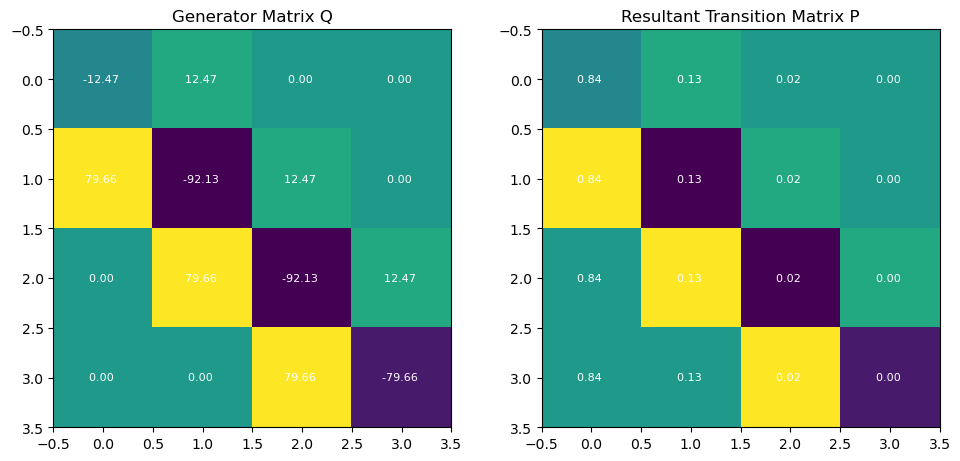

In [137]:
# Pretty Print it 
fig, axs = plt.subplots(1,2)
font_size = 8
fig.tight_layout()
fig.set_size_inches(10,10)
Q = rand_mat

P = scipy.linalg.expm(rand_mat)
print("L1 norm of Q Matrix: ",np.linalg.norm(Q,ord=1) )
print("Sanity check sum ",np.sum(P,axis=1))


axs[0].imshow(Q)
axs[0].set_title('Generator Matrix Q')
axs[1].imshow(Q)
axs[1].set_title('Resultant Transition Matrix P')
for i in range(Q.shape[0]):
    for j in range(Q.shape[1]):
        axs[0].text(j,i,"%2.2f " % Q[i,j],ha="center",va="center",color="w",fontsize=font_size)
        axs[1].text(j,i,"%2.2f " % P[i,j],ha="center",va="center",color="w",fontsize=font_size)
        



In [77]:
# Then get the Transition probability matrix


array([1., 1., 1., 1., 1.])